Elige un color (rojo, verde, azul):  verde


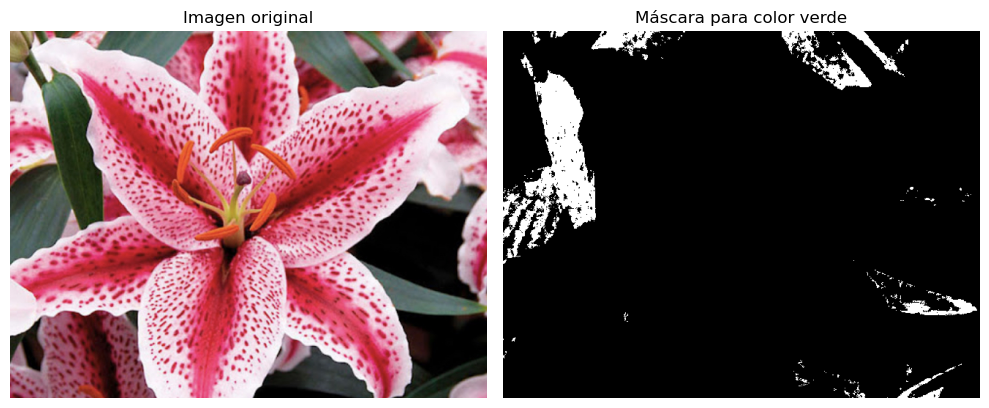

In [96]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# === 1. Cargar la imagen ===
ruta_imagen = "Imagenes/lirio.jpg"  # Cambia la ruta si es necesario
img = cv2.imread(ruta_imagen)
if img is None:
    raise FileNotFoundError("¡Imagen no encontrada!")

img_hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# === 2. Solicitar el color al usuario ===
color = input("Elige un color (rojo, verde, azul): ").strip().lower()

# === 3. Rangos HSV para cada color ===
rangos_hsv = {
    'rojo': ((0, 100, 100), (10, 255, 255)),
    'verde': ((40, 40, 40), (80, 255, 255)),
    'azul': ((100, 100, 100), (140, 255, 255))
}

if color not in rangos_hsv:
    raise ValueError("El color debe ser 'rojo', 'verde' o 'azul'")

bajo, alto = rangos_hsv[color]
mascara = cv2.inRange(img_hsv, bajo, alto)

# === 4. Mostrar resultados ===
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

axs[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
axs[0].set_title("Imagen original")
axs[0].axis("off")

axs[1].imshow(mascara, cmap='gray')
axs[1].set_title(f"Máscara para color {color}")
axs[1].axis("off")

plt.tight_layout()
plt.show()


Выбери тип паттерна (lineas, puntos, gris):  lineas


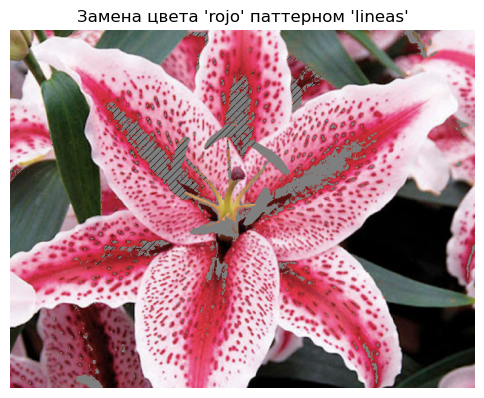

In [92]:
# === 5. Создание паттернов ===
def crear_patron_lineas(shape, angulo=45, espaciado=10):
    patron = np.ones(shape, dtype=np.uint8) * 127
    for i in range(0, shape[0], espaciado):
        cv2.line(patron, (0, i), (shape[1], i - int(shape[1] * np.tan(np.radians(angulo)))), 0, 1)
    return patron

def crear_patron_puntos(shape, espaciado=10):
    patron = np.ones(shape, dtype=np.uint8) * 127
    for y in range(0, shape[0], espaciado):
        for x in range(0, shape[1], espaciado):
            cv2.circle(patron, (x, y), 1, 0, -1)
    return patron

# === 6. Выбор паттерна ===
tipo = input("Выбери тип паттерна (lineas, puntos, gris): ").strip().lower()
shape = mascara.shape

if tipo == "lineas":
    patron = crear_patron_lineas(shape, angulo=45)
elif tipo == "puntos":
    patron = crear_patron_puntos(shape)
elif tipo == "gris":
    patron = np.ones(shape, dtype=np.uint8) * 127  # Просто серый цвет
else:
    raise ValueError("Тип паттерна должен быть 'lineas', 'puntos' или 'gris'")

# === 7. Применение маски к паттерну (в сером виде) ===
zona_patron = cv2.bitwise_and(patron, patron, mask=mascara)

# === 8. Создание 3-канального изображения для паттерна ===
zona_patron_color = cv2.merge([zona_patron]*3)  # Из 1 канала делаем 3, чтобы вставить в цветное

# === 9. Комбинирование: вставить паттерн в цветное изображение ===
img_color_final = img.copy()
img_color_final[mascara > 0] = zona_patron_color[mascara > 0]

# === 10. Показ результата ===
plt.figure(figsize=(6, 5))
plt.imshow(cv2.cvtColor(img_color_final, cv2.COLOR_BGR2RGB))
plt.title(f"Замена цвета '{color}' паттерном '{tipo}'")
plt.axis("off")
plt.show()
